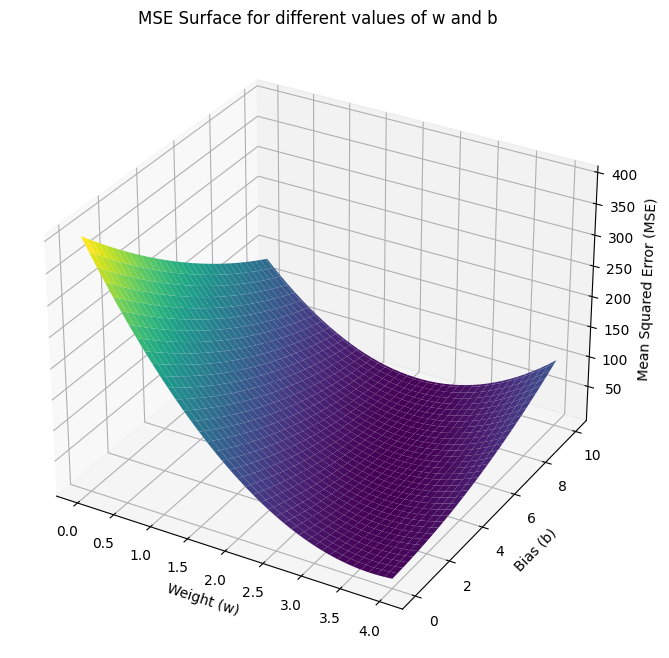

In [6]:
import csv
import gzip

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# y = 3 * x + 5
x_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y_data = [8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0, 30.0]

def forward(x, w, b):
    return x * w + b

def loss(x, y, w, b):
    y_pred = forward(x, w, b)
    return (y_pred - y)**2

w_list = np.arange(0.0, 4.1, 0.1)
b_list = np.arange(0.0, 10.1, 0.1)
W, B = np.meshgrid(w_list, b_list)
mse_list = np.zeros_like(W)

for i in range(len(w_list)):
    for j in range(len(b_list)):
        w = w_list[i]
        b = b_list[j]
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred = forward(x_val, w, b)
            loss_val = loss(x_val, y_val, w, b)
            l_sum += loss_val
        mse_list[j, i] = l_sum / len(x_data)

# Plotting in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, mse_list, cmap='viridis')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')
ax.set_title('MSE Surface for different values of w and b')
plt.show()


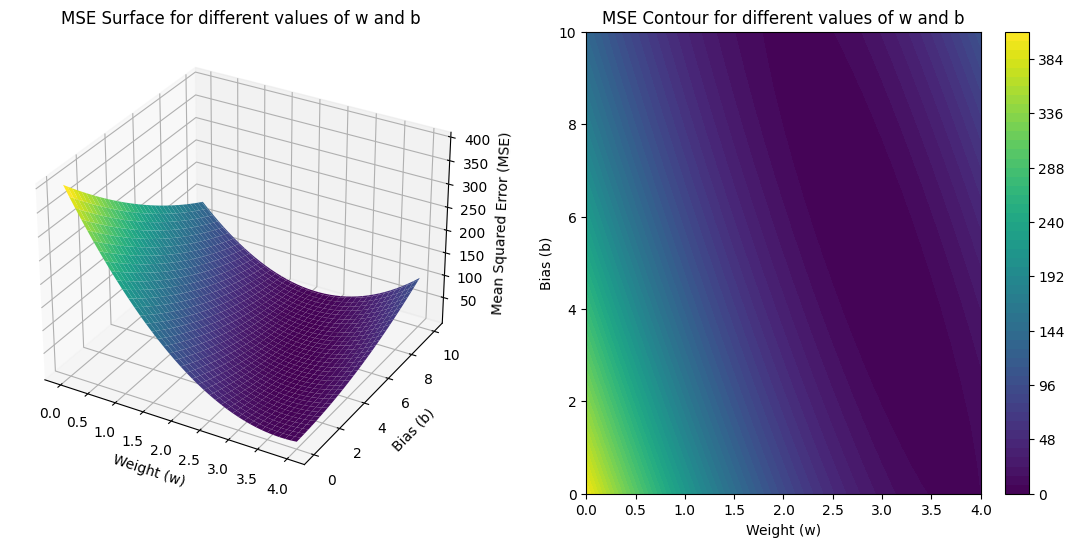

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# y = 3 * x + 5
x_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y_data = [8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0, 30.0]

def forward(x, w, b):
    return x * w + b

def loss(x, y, w, b):
    y_pred = forward(x, w, b)
    return (y_pred - y)**2

w_list = np.arange(0.0, 4.1, 0.1)
b_list = np.arange(0.0, 10.1, 0.1)
W, B = np.meshgrid(w_list, b_list)
mse_list = np.zeros_like(W)

for i in range(len(w_list)):
    for j in range(len(b_list)):
        w = w_list[i]
        b = b_list[j]
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred = forward(x_val, w, b)
            loss_val = loss(x_val, y_val, w, b)
            l_sum += loss_val
        mse_list[j, i] = l_sum / len(x_data)

# 创建图形和子图
fig = plt.figure(figsize=(14, 6))

# 第一个子图
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W, B, mse_list, cmap='viridis')
ax1.set_xlabel('Weight (w)')
ax1.set_ylabel('Bias (b)')
ax1.set_zlabel('Mean Squared Error (MSE)')
ax1.set_title('MSE Surface for different values of w and b')

# 第二个子图（示例）
ax2 = fig.add_subplot(122)
c = ax2.contourf(W, B, mse_list, levels=50, cmap='viridis')
fig.colorbar(c, ax=ax2)
ax2.set_xlabel('Weight (w)')
ax2.set_ylabel('Bias (b)')
ax2.set_title('MSE Contour for different values of w and b')

plt.show()


In [10]:
import torch
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w1 = torch.tensor([1.0])
w1.requires_grad = True
w2 = torch.tensor([1.0])
w2.requires_grad = True
b = torch.tensor([1.0])
b.requires_grad = True

def forward(x):
    return w1 * x ** 2 + w2 * x + b

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        print('\tgrad:',x,y,w1.grad.item(),w2.grad.item(),b.grad.item())
        w1.data = w1.data - w1.grad.data * 0.01
        w2.data = w2.data - w2.grad.data * 0.01
        b.data = b.data - b.grad.data * 0.01
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()
    print('Epoch:', epoch, l.item())
    print('Predict(after training)',4,forward(4).item())

	grad: 1.0 2.0 2.0 2.0 2.0
	grad: 2.0 4.0 22.880001068115234 11.440000534057617 5.720000267028809
	grad: 3.0 6.0 77.04720306396484 25.682401657104492 8.560800552368164
Epoch: 0 18.321826934814453
Predict(after training) 4 2.963944435119629
	grad: 1.0 2.0 -1.1466078758239746 -1.1466078758239746 -1.1466078758239746
	grad: 2.0 4.0 -15.536651611328125 -7.7683258056640625 -3.8841629028320312
	grad: 3.0 6.0 -30.432214736938477 -10.144071578979492 -3.381357192993164
Epoch: 1 2.858394145965576
Predict(after training) 4 11.348901748657227
	grad: 1.0 2.0 0.3451242446899414 0.3451242446899414 0.3451242446899414
	grad: 2.0 4.0 2.4273414611816406 1.2136707305908203 0.6068353652954102
	grad: 3.0 6.0 19.449920654296875 6.483306884765625 2.161102294921875
Epoch: 2 1.1675907373428345
Predict(after training) 4 7.440505504608154
	grad: 1.0 2.0 -0.32242679595947266 -0.32242679595947266 -0.32242679595947266
	grad: 2.0 4.0 -5.845773696899414 -2.922886848449707 -1.4614434242248535
	grad: 3.0 6.0 -3.882885932

In [7]:
import torch

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

w =  1.9995695352554321
b =  0.000978425145149231
y_pred =  tensor([[7.9993]])


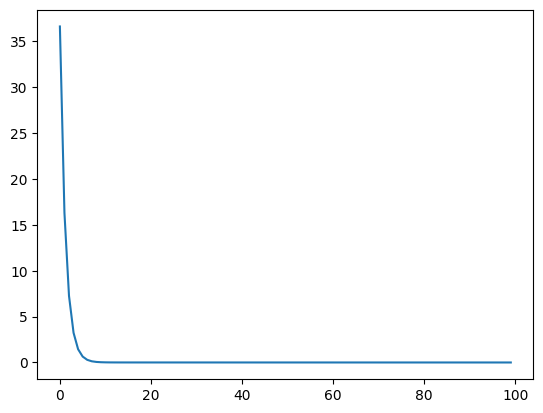

In [10]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

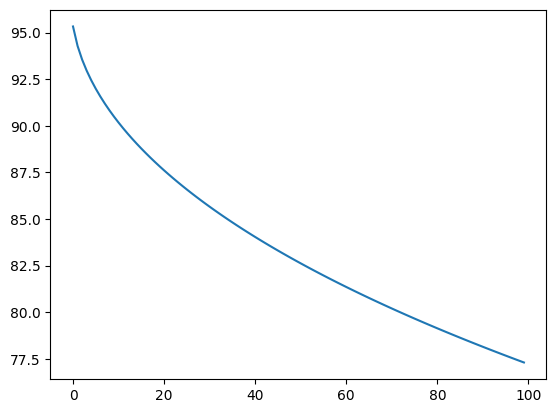

In [11]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

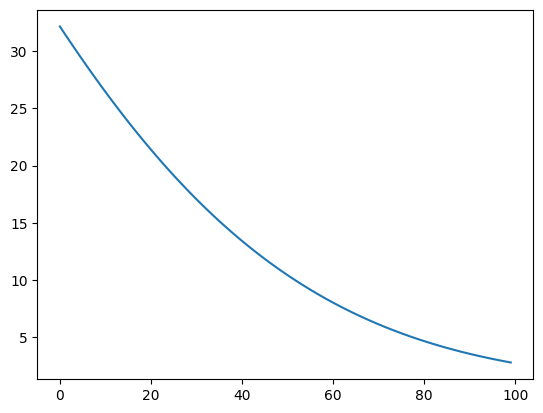

In [12]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

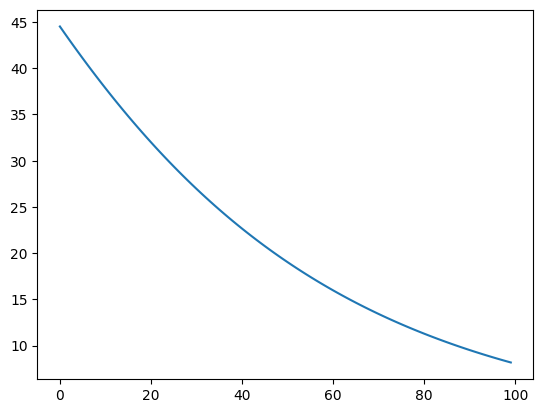

In [15]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

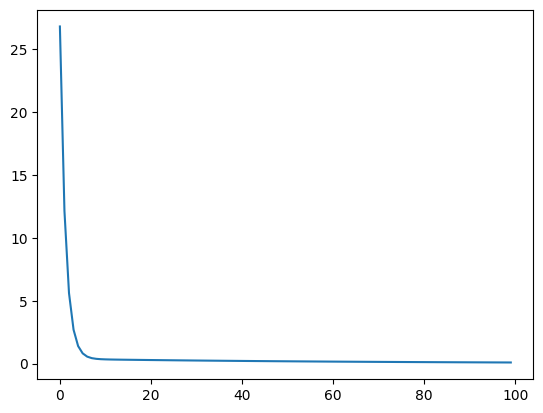

In [16]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

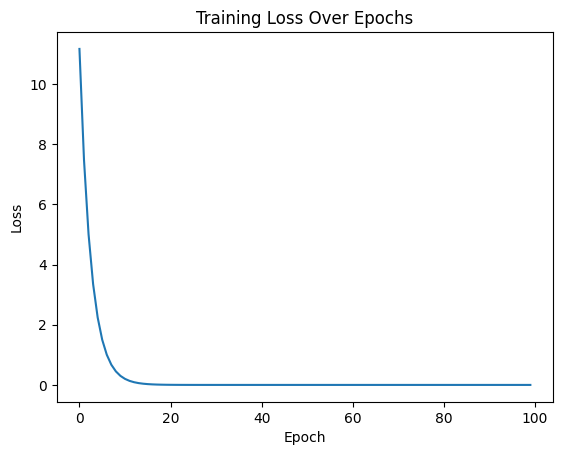

In [20]:
import torch
import matplotlib.pyplot as plt

# 数据
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

# 模型
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

# 训练循环
for epoch in range(100):
    def closure():
        optimizer.zero_grad()
        y_pred = model(x_data)
        loss = criterion(y_pred, y_data)
        loss.backward()
        return loss

    optimizer.step(closure)
    with torch.no_grad():
        y_pred = model(x_data)
        loss = criterion(y_pred, y_data)
        epoch_list.append(epoch)
        loss_list.append(loss.item())

# 绘制损失图
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


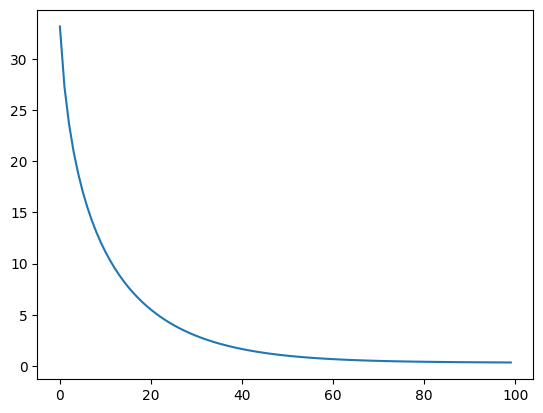

In [18]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

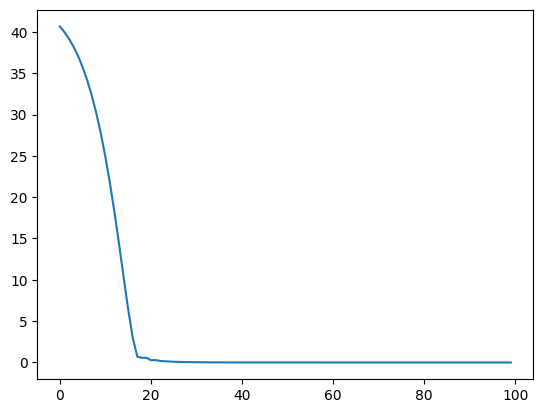

In [19]:
import torch
import matplotlib.pyplot as plt
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Rprop(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.show()

Epoch [100/1000], Loss: 1.5694
Epoch [200/1000], Loss: 1.4573
Epoch [300/1000], Loss: 1.3615
Epoch [400/1000], Loss: 1.2790
Epoch [500/1000], Loss: 1.2072
Epoch [600/1000], Loss: 1.1442
Epoch [700/1000], Loss: 1.0886
Epoch [800/1000], Loss: 1.0390
Epoch [900/1000], Loss: 0.9947
Epoch [1000/1000], Loss: 0.9547
Epoch [1100/1000], Loss: 0.9184
Epoch [1200/1000], Loss: 0.8853
Epoch [1300/1000], Loss: 0.8550
Epoch [1400/1000], Loss: 0.8271
Epoch [1500/1000], Loss: 0.8013
Epoch [1600/1000], Loss: 0.7774
Epoch [1700/1000], Loss: 0.7552
Epoch [1800/1000], Loss: 0.7344
Epoch [1900/1000], Loss: 0.7150
Epoch [2000/1000], Loss: 0.6968
Epoch [2100/1000], Loss: 0.6796
Epoch [2200/1000], Loss: 0.6634
Epoch [2300/1000], Loss: 0.6480
Epoch [2400/1000], Loss: 0.6335
Epoch [2500/1000], Loss: 0.6197
Epoch [2600/1000], Loss: 0.6066
Epoch [2700/1000], Loss: 0.5941
Epoch [2800/1000], Loss: 0.5822
Epoch [2900/1000], Loss: 0.5708
Epoch [3000/1000], Loss: 0.5599
Epoch [3100/1000], Loss: 0.5495
Epoch [3200/1000]

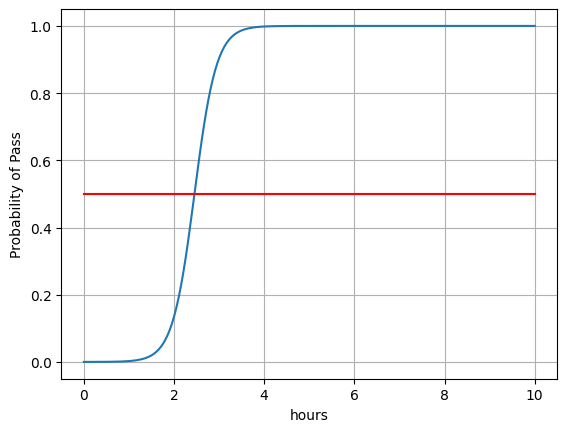

In [32]:
import torch
import numpy as np
import torch.nn.functional as F

# 数据
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [1.0]])

# 模型
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))  # 注意torch.sigmoid
        return y_pred

model = LogisticRegressionModel()

criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练循环
for epoch in range(10000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# 测试模型
x_test = torch.tensor([[4.0]])
with torch.no_grad():
    y_test = model(x_test)
    predicted = y_test.round()
    print(f'Predicted values: {predicted}')

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('hours')
plt.ylabel('Probability of Pass')
plt.grid(True)
plt.show()

loss =  0.4050470292568207 acc =  0.7971014492753623
loss =  0.37677139043807983 acc =  0.8313570487483531
loss =  0.3591935336589813 acc =  0.8313570487483531
loss =  0.3420710861682892 acc =  0.8458498023715415
loss =  0.3360763192176819 acc =  0.8458498023715415
loss =  0.33091071248054504 acc =  0.849802371541502
loss =  0.3221176564693451 acc =  0.855072463768116
loss =  0.3139905631542206 acc =  0.8563899868247694
loss =  0.3086816370487213 acc =  0.8603425559947299
loss =  0.3044075667858124 acc =  0.8590250329380764


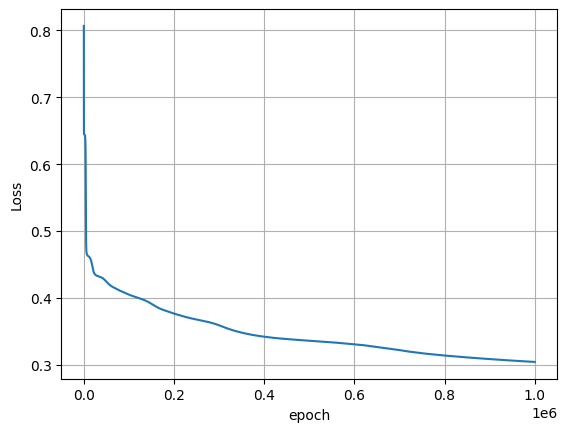

In [39]:
import numpy as np
import torch
import matplotlib.pyplot as plt

xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:, [-1]])


class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 网络一层
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = Model()

criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epoch_list = []
loss_list = []

for epoch in range(1000000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    if epoch%100000 == 99999:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(epoch_list, loss_list)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    def __len__(self):
        return self.len
    


class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()

criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

if __name__ == '__main__':
    dataset = DiabetesDataset('diabetes.csv')
    train_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0)
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [52]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307), (0.3081))])

train_dataset = datasets.MNIST('../dataset/mnist', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST('../dataset/mnist', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(784, 512)
        self.linear2 = torch.nn.Linear(512, 256)
        self.linear3 = torch.nn.Linear(256, 128)
        self.linear4 = torch.nn.Linear(128, 64)
        self.linear5 = torch.nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        # 不需要激活函数 返回概率
        return self.linear5(x)
    
model = Net()

# 交叉熵 Softmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
# 随机下降梯度
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # 反向导数清零
        optimizer.zero_grad()
        # 计算模型
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向导数
        loss.backward()
        # 导数更新
        optimizer.step()
        
        running_loss += loss.item()
        if i % 300 == 299:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            # 获取当前预测数量
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy: {:.2f}%'.format(100 * correct / total))

if __name__ == '__main__':
    for epoch in range(100):
        train(epoch)
        test()

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../dataset/mnist\MNIST\raw\train-images-idx3-ubyte.gz to ../dataset/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../dataset/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ../dataset/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../dataset/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ../dataset/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../dataset/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../dataset/mnist\MNIST\raw

[1,   300] loss: 2.254
[1,   600] loss: 1.106
[1,   900] loss: 0.445
accuracy: 90.00%
[2,   300] loss: 0.326
[2,   600] loss: 0.274
[2,   900] loss: 0.232
accuracy: 93.75%
[3,   300] loss: 0.197
[3,   600] loss: 0.171
[3,   900] loss: 0.155
accuracy: 95.62%
[4,   300] loss: 0.134
[4,   600] loss: 0.126
[4,   900] loss: 0.121
accuracy: 96.36%
[5,   300] loss: 0.097
[5,   600] loss: 0.103
[5,   900] loss: 0.097
accuracy: 96.75%
[6,   300] loss: 0.078
[6,   600] loss: 0.078
[6,   900] loss: 0.081
accuracy: 97.22%
[7,   300] loss: 0.064
[7,   600] loss: 0.064
[7,   900] loss: 0.065
accuracy: 97.25%
[8,   300] loss: 0.048
[8,   600] loss: 0.053
[8,   900] loss: 0.055
accuracy: 97.29%
[9,   300] loss: 0.040
[9,   600] loss: 0.044
[9,   900] loss: 0.043
accuracy: 97.63%
[10,   300] loss: 0.031
[10,   600] loss: 0.035
[10,   900] loss: 0.035
accuracy: 97.45%
[11,   300] loss: 0.028
[11,   600] loss: 

KeyboardInterrupt: 

In [14]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307), (0.3081))])

train_dataset = datasets.MNIST('../dataset/mnist', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST('../dataset/mnist', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        '''
        28*28
        卷积 24*24
        池化 12*12
        卷积 8*8
        池化 4*4
        卷积 1*1
        池化 1*1
        '''
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 40, kernel_size=5)
        self.conv3 = torch.nn.Conv2d(40, 80, kernel_size=3)
        self.pooling = torch.nn.MaxPool2d(kernel_size=2)
        self.fc1 = torch.nn.Linear(80, 40)
        self.fc2 = torch.nn.Linear(40, 20)
        self.fc3 = torch.nn.Linear(20, 10)
        
        
        
    def forward(self, x):
        batch_size = x.size(0)
        # 不需要激活函数 返回概率
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = F.relu(self.pooling(self.conv3(x)))
        x = x.view(batch_size, -1)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


# 交叉熵 Softmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
# 随机下降梯度
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 反向导数清零
        optimizer.zero_grad()
        # 计算模型
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向导数
        loss.backward()
        # 导数更新
        optimizer.step()
        
        running_loss += loss.item()
        if i % 300 == 299:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            # 获取当前预测数量
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy: {:.2f}%'.format(100 * correct / total))

if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

[1,   300] loss: 2.260
[1,   600] loss: 0.963
[1,   900] loss: 0.330
accuracy: 94.13%
[2,   300] loss: 0.194
[2,   600] loss: 0.141
[2,   900] loss: 0.131
accuracy: 96.74%
[3,   300] loss: 0.102
[3,   600] loss: 0.099
[3,   900] loss: 0.089
accuracy: 97.80%
[4,   300] loss: 0.070
[4,   600] loss: 0.075
[4,   900] loss: 0.071
accuracy: 98.36%
[5,   300] loss: 0.057
[5,   600] loss: 0.060
[5,   900] loss: 0.060
accuracy: 98.68%
[6,   300] loss: 0.048
[6,   600] loss: 0.052
[6,   900] loss: 0.048
accuracy: 98.35%
[7,   300] loss: 0.043
[7,   600] loss: 0.042
[7,   900] loss: 0.041
accuracy: 98.74%
[8,   300] loss: 0.040
[8,   600] loss: 0.033
[8,   900] loss: 0.039
accuracy: 98.83%
[9,   300] loss: 0.032
[9,   600] loss: 0.031
[9,   900] loss: 0.035
accuracy: 98.74%
[10,   300] loss: 0.030
[10,   600] loss: 0.026
[10,   900] loss: 0.028
accuracy: 98.74%


In [3]:
# google net
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307), (0.3081))])

train_dataset = datasets.MNIST('../dataset/mnist', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST('../dataset/mnist', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

class InceptionA(torch.nn.Module):
    def __init__(self, in_channels):
        super(self.__class__, self).__init__()
        self.branch1x1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        
        self.branch5x5_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = torch.nn.Conv2d(16, 24, kernel_size=5, padding=2)
        
        self.branch3x3_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3_2 = torch.nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3_3 = torch.nn.Conv2d(24, 24, kernel_size=3, padding=1)
        
        self.branch_pool = torch.nn.Conv2d(in_channels, 24, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch5x5, branch3x3, branch_pool]
        return torch.cat(outputs, dim=1)
        
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(88, 20, kernel_size=5)
        
        self.incep1 = InceptionA(in_channels=10)
        self.incep2 = InceptionA(in_channels=20)
        
        self.mp = torch.nn.MaxPool2d(kernel_size=2)
        self.fc = torch.nn.Linear(1408, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        # print("x.size", x.size())
        x = F.relu(self.mp(self.conv1(x)))
        # print("conv1.size", x.size())
        x = self.incep1(x) # 88
        # print("incep1.size", x.size())
        x = F.relu(self.mp(self.conv2(x)))
        # print("conv2.size", x.size())
        x = self.incep2(x)
        # print("incep2.size", x.size())
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x
        
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


# 交叉熵 Softmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
# 随机下降梯度
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 反向导数清零
        optimizer.zero_grad()
        # 计算模型
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向导数
        loss.backward()
        # 导数更新
        optimizer.step()
        
        running_loss += loss.item()
        if i % 300 == 299:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            # 获取当前预测数量
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy: {:.2f}%'.format(100 * correct / total))

if __name__ == '__main__':
    for epoch in range(1):
        train(epoch)
        test()

KeyboardInterrupt: 

In [20]:
# Residual Network
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307), (0.3081))])

train_dataset = datasets.MNIST('../dataset/mnist', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST('../dataset/mnist', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

class ResidualBlock(torch.nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.channels = in_channels
        self.conv1 = torch.nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(y + x)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=5)
        
        self.rblock1 = ResidualBlock(16)
        self.rblock2 = ResidualBlock(32)
        
        
        self.mp = torch.nn.MaxPool2d(kernel_size=2)
        self.fc = torch.nn.Linear(512, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.rblock1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.rblock2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x
        
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


# 交叉熵 Softmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
# 随机下降梯度
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 反向导数清零
        optimizer.zero_grad()
        # 计算模型
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向导数
        loss.backward()
        # 导数更新
        optimizer.step()
        
        running_loss += loss.item()
        if i % 300 == 299:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            # 获取当前预测数量
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy: {:.2f}%'.format(100 * correct / total))

if __name__ == '__main__':
    for epoch in range(1):
        train(epoch)
        test()

[1,   300] loss: 0.486
[1,   600] loss: 0.146
[1,   900] loss: 0.114
accuracy: 97.59%


In [1]:
import torch

batch_size = 1
seq_len = 3
hidden_size= 2
input_size = 4
num_layers = 1

cell = torch.nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)

input = torch.randn(seq_len, batch_size, input_size)
hidden = torch.zeros(num_layers, batch_size, hidden_size)

out, hidden = cell(input, hidden)

print(out.shape)
print(out)
print(hidden.shape)
print(hidden)

torch.Size([3, 1, 2])
tensor([[[-0.1433,  0.8811]],

        [[ 0.6323,  0.4751]],

        [[ 0.0519,  0.3218]]], grad_fn=<StackBackward0>)
torch.Size([1, 1, 2])
tensor([[[0.0519, 0.3218]]], grad_fn=<StackBackward0>)


In [ ]:
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
import csv
import gzip
from torch.utils.data import Dataset, DataLoader

HIDDEN_SIZE = 100
BATCH_SIZE = 256
N_LAYER = 2
N_EPOCHS = 10
N_CHARS = 128
USE_GPU = True

class NameDataset(Dataset):
    def __init__(self, is_train_set=True):
        filename = '../dataset/name/names_train.csv.gz' if is_train_set else '../dataset/name/names_test.csv.gz'
        with gzip.open(filename, 'rt') as f:
            reader = csv.reader(f)
            rows = list(reader)
        self.names = [row[0] for row in rows]
        self.len = len(self.names)
        self.countries = [row[1] for row in rows]
        self.country_list = list(sorted(set(self.countries)))
        self.country_dict = self.getCountryDict()
        self.country_num = len(self.country_list)
        
    def __getitem__(self, index):
        return self.names[index], self.country_dict[self.countries[index]]
    
    def __len__(self):
        return self.len
    
    def getCountryDict(self):
        country_dict = dict()
        for idx, country_name in enumerate(self.country_list, 0):
            country_dict[country_name] = idx
        return country_dict
    def idx2country(self, index):
        return self.country_list[index]
    def getCountriesNum(self):
        return self.country_num
        
trainset = NameDataset(is_train_set=True)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testset = NameDataset(is_train_set=False)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

N_COUNTRY = trainset.getCountriesNum()


def create_tensor(tensor):
    if USE_GPU:
        device = torch.device("cuda:0")
        tensor = tensor.to(device)
    return tensor

def name2list(name):
    arr = [ord(c) for c in name]
    return arr, len(arr)

def make_tensors(names, countries):
    sequences_and_lengths = [name2list(name) for name in names]
    name_sequences = [sl[0] for sl in sequences_and_lengths]
    seq_lengths = torch.LongTensor([sl[1] for sl in sequences_and_lengths])
    countries = countries.long()
    
    seq_tensor = torch.zeros((len(name_sequences), seq_lengths.max()), dtype=torch.long)
    for idx, (seq, seq_len) in enumerate(zip(name_sequences, seq_lengths)):
        seq_tensor[idx, :seq_len] = torch.LongTensor(seq)
    seq_lengths, perm_idx = seq_lengths.sort(0, descending=True)
    seq_tensor = seq_tensor[perm_idx]
    countries = countries[perm_idx]
    return create_tensor(seq_tensor), seq_lengths.to('cpu'), create_tensor(countries)
    
    
class RNNClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1, bidirectional=True):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.n_directions = 2 if bidirectional else 1
        self.embedding = torch.nn.Embedding(input_size, hidden_size)
        self.gru = torch.nn.GRU(hidden_size, hidden_size, n_layers, bidirectional=bidirectional)
        self.fc = torch.nn.Linear(hidden_size * self.n_directions, output_size)
      
    def _init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers * self.n_directions, batch_size, self.hidden_size)
        return create_tensor(hidden)
    
    def forward(self, inputs, seq_lengths):
        input = inputs.t()
        batch_size = input.size(1)
        hidden = self._init_hidden(batch_size)
        embedding = self.embedding(input)
        gru_input = torch.nn.utils.rnn.pack_padded_sequence(embedding, seq_lengths)
        
        output, hidden = self.gru(gru_input, hidden)
        
        if self.n_directions == 2:
            hidden_cat = torch.cat([hidden[-1], hidden[-2]], dim=1)
        else:
            hidden_cat = hidden[-1]
        fc_output = self.fc(hidden_cat)
        return fc_output

def trainModel():
    total_loss = 0
    for i, (names, countries) in enumerate(trainloader, 1):
        inputs, seq_lengths, target = make_tensors(names, countries)
        output = classifier(inputs, seq_lengths)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        if i % 10 == 0:
            print(epoch, i * len(inputs) / len(trainset), total_loss / (i * len(inputs)))
    return total_loss 
            

def testModel():
    correct = 0
    total = len(testset)
    with torch.no_grad():
        for i, (names, countries) in enumerate(testloader, 1):
            inputs, seq_lengths, target = make_tensors(names, countries)
            output = classifier(inputs, seq_lengths)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
        percent = '%.2f' % (100 * correct / total)
        print(f'Test set: Accuracy {correct}/{total} {percent}%')
    return correct / total

if __name__ == '__main__':
    classifier = RNNClassifier(N_CHARS, HIDDEN_SIZE, N_COUNTRY, N_LAYER)
    if USE_GPU:
        device = torch.device("cuda:0")
        classifier.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
    
    start = time.time()
    print("Training for %d epochs" % N_EPOCHS)
    acc_list = []
    for epoch in range(1, N_EPOCHS + 1):
        trainModel()
        acc = testModel()
        acc_list.append(acc)
    epoch = np.arange(1, len(acc_list) + 1, 1)
    acc_list = np.array(acc_list)
    plt.plot(epoch, acc_list)
    plt.show()


Training for 10 epochs
1 0.1914161806490205 0.00913463942706585
1 0.382832361298041 0.00793564529158175
1 0.5742485419470614 0.007119073268646995
1 0.765664722596082 0.006598933250643313
1 0.9570809032451024 0.0062459924723953005
Test set: Accuracy 4447/6700 66.37%
2 0.1914161806490205 0.00429712173063308
2 0.382832361298041 0.00424891198053956
2 0.5742485419470614 0.0040748959174379705
2 0.765664722596082 0.003985232178820297
2 0.9570809032451024 0.0038861949974671006
Test set: Accuracy 4925/6700 73.51%
3 0.1914161806490205 0.0033505674917250873
3 0.382832361298041 0.0032215303974226115
3 0.5742485419470614 0.003132911561988294
3 0.765664722596082 0.0031115763704292476
3 0.9570809032451024 0.0030813942523673175
Test set: Accuracy 5264/6700 78.57%
4 0.1914161806490205 0.0027040384709835054
4 0.382832361298041 0.0026269620400853457
4 0.5742485419470614 0.0026083264034241437
4 0.765664722596082 0.0025767286075279116
4 0.9570809032451024 0.0025321800261735917
Test set: Accuracy 5388/6700 